In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [30]:
df=pd.read_csv('C:/Users/prana.LAPTOP-QSV5O04O/Desktop/Learning/Data Science/Projects/Datasets/IMDb Movies India.csv')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [32]:
df.shape

(15509, 10)

In [33]:
# Handling missing values
df.dropna(subset=['Rating', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

In [34]:
# Impute missing values for 'Votes' and 'Duration' before converting to integers
df['Votes'] = df['Votes'].str.replace(',', '').astype(float)
df['Votes'].fillna(df['Votes'].median(), inplace=True)
df['Votes'] = df['Votes'].astype(int)

In [35]:
df['Duration'] = df['Duration'].str.replace(' min', '').astype(float)
df['Duration'].fillna(df['Duration'].median(), inplace=True)
df['Duration'] = df['Duration'].astype(int)

In [36]:
# Extract year from 'Year' column and handle missing values
df['Year'] = df['Year'].str.extract('(\d{4})').astype(float)
df['Year'].fillna(df['Year'].median(), inplace=True)
df['Year'] = df['Year'].astype(int)

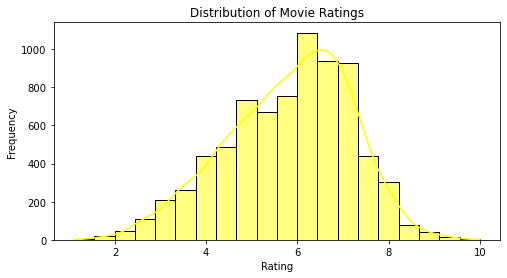

In [28]:
# Data Visualization
plt.figure(figsize=(8, 4))
sns.histplot(df['Rating'], bins=20, kde=True, color='yellow')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

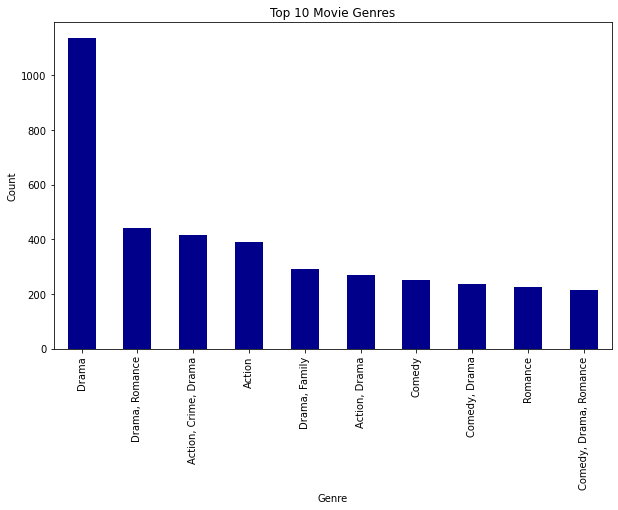

In [39]:
plt.figure(figsize=(10, 6))
df['Genre'].value_counts().head(10).plot(kind='bar', color='darkblue')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

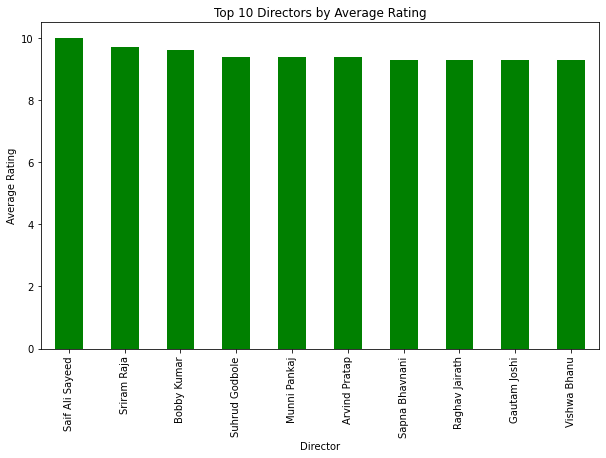

In [40]:
top_directors = df.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_directors.plot(kind='bar', color='green')
plt.title('Top 10 Directors by Average Rating')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.show()

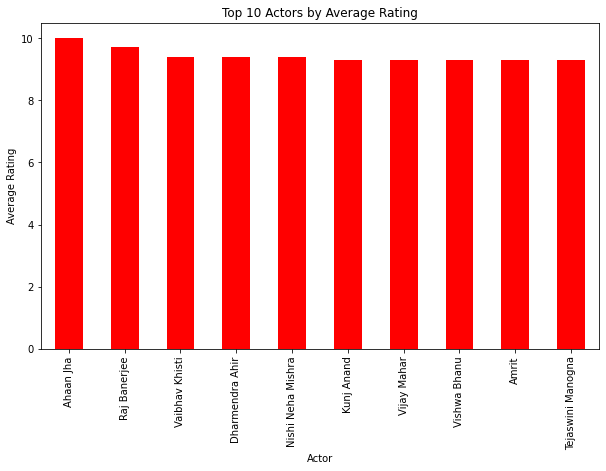

In [41]:
top_actors = df.groupby('Actor 1')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_actors.plot(kind='bar', color='red')
plt.title('Top 10 Actors by Average Rating')
plt.xlabel('Actor')
plt.ylabel('Average Rating')
plt.show()

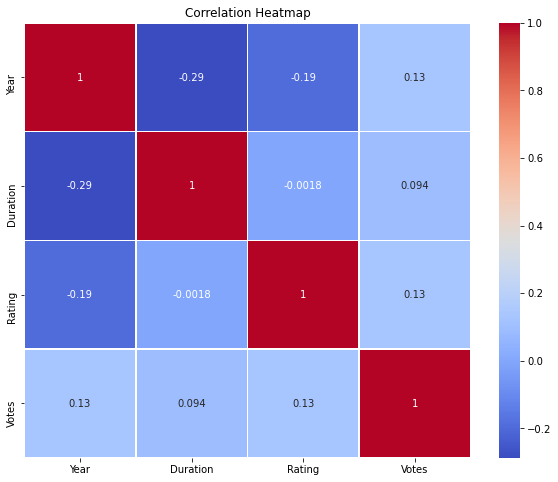

In [42]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [43]:
# One-hot encoding for categorical features
categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
df = pd.get_dummies(df, columns=categorical_features)

In [44]:
# Feature and target variables
X = df.drop('Rating', axis=1)
y = df['Rating']

In [45]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Preprocessing pipeline
numeric_features = ['Year', 'Duration', 'Votes']
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])

In [47]:
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])

In [48]:
# Model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(random_state=42))])

In [49]:
# Hyperparameter tuning
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

In [50]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Year',
                                                                          'Duration',
                                                                          'Votes'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_j

In [51]:
# Best model
best_model = grid_search.best_estimator_

In [52]:
# Predictions and evaluation
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [53]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 1.3215097848561692
Mean Absolute Error: 0.8777293465022887
R-squared: 0.2867642931585761


In [54]:
# Cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation MSE:", -cv_scores.mean())

Cross-validation MSE: 1.3244140268477091
